In [1]:
import numpy as np

# Задание 1
Создайте numpy array с элементами от числа N до 0 (например, для N = 10 это будет array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])).

## Решение 

In [9]:
    N = eval(input('Введите число элементов в массиве: '))-1
    x = np.arange(N,-1,-1)
    print(x)

Введите число элементов в массиве:  15


[14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


# Задание 2
Создайте диагональную матрицу с элементами от N до 0. Посчитайте сумму ее значений на диагонали.
## Решение

In [10]:
    N = eval(input('Введите число диагональных эдементов: '))-1
    x = np.diag(np.arange(N, -1, -1), k=0)
    print(x)
    summ = np.trace(x) # В данном конкретном случае аналогично np.sum(x), но если сдвинуть значения в задании x, выведет 0
    print('Сумма значений по диагонали: ', summ)

Введите число диагональных эдементов:  10


[[9 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]]
Сумма значений по диагонали:  45


# Задание 3
Решите систему уравнений:

4x + 2y + z = 4

x + 3y = 12

5y + 4z = -3
## Решение

In [29]:
    left = np.array([[4, 2, 1], [1, 3, 0], [0, 5, 4]])
    right = np.array([4, 12, -3])
    from numpy import linalg

    print('Решение: ', linalg.solve(left, right))

Решение:  [ 0.46666667  3.84444444 -5.55555556]


## Более абстрактное решение:

In [ ]:
    n = eval(input('Количество уравнений: '))
    l = eval(input('Количество переменных: '))
    if n < l:
        print('Количество уравнений меньше количества переменных, решить нельзя')
        sys.exit()
    sys_coefs = np.array([])
    sys_rigt = np.array([])
    for i in range(n):
        ur_coefs = np.array([])
        print('Ввод коэффициентов для уравнения ', i + 1)
        for j in range(l):
            text = '   Коэффициент переменной ' + str(j + 1) + ' : '
            ur_coefs = np.append(ur_coefs, eval(input(text)))
        text = '      Решение уравнения' + str(i + 1) + ': '
        sys_rigt = np.append(sys_rigt, eval(input(text)))
        sys_coefs = np.append(sys_coefs, ur_coefs)
    sys_coefs = sys_coefs.reshape(n, l)

    from numpy import linalg
    print('Решение: ', linalg.solve(sys_coefs, sys_rigt))

# Задание 4
Имеется матрица покупок в интернет-магазине. Столбец А - ID пользователя. Остальные столбцы - количество покупок категорий товаров этим пользователем:

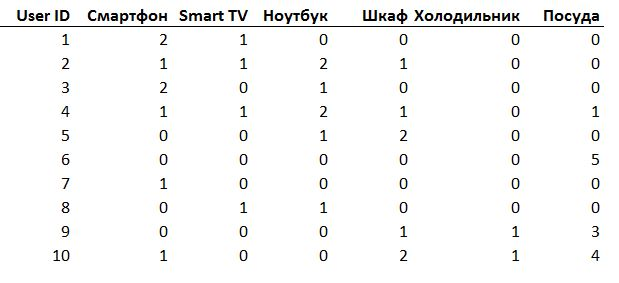

In [ ]:
from IPython.display import Image
Image("user_matrix.JPG")

Матрица в виде numpy array

In [13]:
users_stats = np.array(
    [
        [2, 1, 0, 0, 0, 0],
        [1, 1, 2, 1, 0, 0],
        [2, 0, 1, 0, 0, 0],
        [1, 1, 2, 1, 0, 1],
        [0, 0, 1, 2, 0, 0],
        [0, 0, 0, 0, 0, 5],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 3],
        [1, 0, 0, 2, 1, 4]
    ], 
    np.int32
)

На сайт заходит очередной посетитель, о покупках которого известно следующее:

In [22]:
next_user_stats = np.array([0, 1, 2, 0, 0, 0])

Найдите самого похожего пользователя. Т. е. посчитайте косинусное сходство между этим пользователем и всеми пользователями из массива user_stats

## Решение

Определим функцию cosine(a,b), вычисляющую косинусное сходство между векторами (массивами):

In [25]:
def cosine(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

Основная программа:

Наибольшая схожесть с пользователем с индексом  7


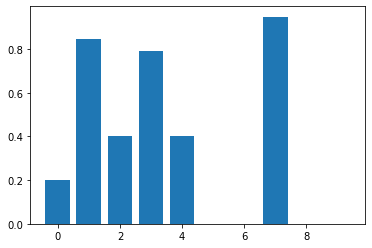

In [28]:
    import matplotlib.pyplot as plt

    users_stats = np.array(
        [
            [2, 1, 0, 0, 0, 0],
            [1, 1, 2, 1, 0, 0],
            [2, 0, 1, 0, 0, 0],
            [1, 1, 2, 1, 0, 1],
            [0, 0, 1, 2, 0, 0],
            [0, 0, 0, 0, 0, 5],
            [1, 0, 0, 0, 0, 0],
            [0, 1, 1, 0, 0, 0],
            [0, 0, 0, 1, 1, 3],
            [1, 0, 0, 2, 1, 4]
        ], np.int32)

    next_user_stats = np.array([0, 1, 2, 0, 0, 0])
    alikeness = np.array([])
    max_ind = 0

    for i in range(users_stats.shape[0]):
        alikeness = np.append(alikeness, cosine(next_user_stats, users_stats[i]))
        if i > 0 and alikeness[i] > alikeness[i - 1]:
            max_ind = i
    print('Наибольшая схожесть с пользователем с индексом ', max_ind)

    plt.bar(np.arange(0,users_stats.shape[0]), alikeness)
    plt.show()

Здесь также выведена столбчатая диаграмма для визуализации сходства пользователей из основного массива с новыым пользователем.